## 03-聚合并表示不确定性

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

#让jupyter notebook的Cell可以将多个变量显示出来。
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

sns.set(style="darkgrid")

更复杂的数据集将对x变量的相同值有多个观测值。seaborn中默认通过绘制x的平均值和x的95％置信区间来聚合每个x的多个测量值：

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


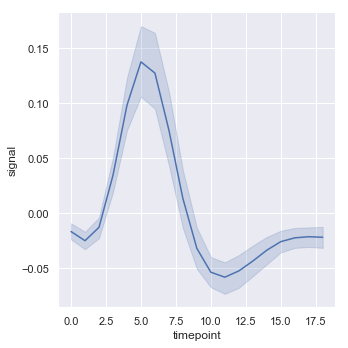

In [9]:
fmri = pd.read_csv('fmri.csv')
fmri.head()

sns.relplot(x='timepoint', 
            y='signal',
            kind='line',
            data=fmri)

## 置信区间ci
使用bootstrapping来计算置信区间（confidence intervals），这对于较大的数据集来说会是时间密集型的。因此我们可以对该方法采用禁用。参数ci=None表示禁用

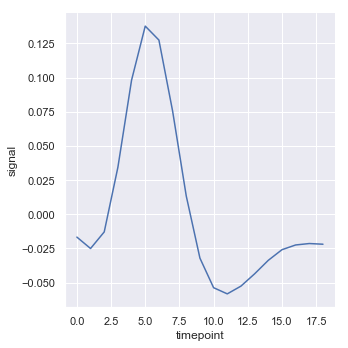

In [10]:
sns.relplot(x='timepoint', 
            y='signal',
            kind='line',
            ci=None,
            data=fmri)

另一个好的选择，特别是对于更大的数据，是通过绘制``标准偏差sd``而不是置信区间来表示每个时间点的分布范围。ci参数设置为'sd'

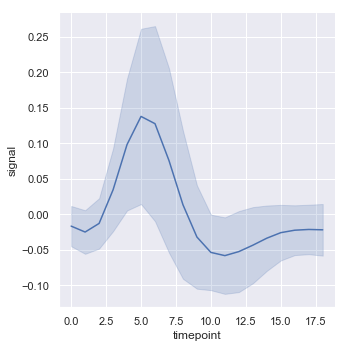

In [11]:
sns.relplot(x='timepoint', 
            y='signal',
            kind='line',
            ci='sd',
            data=fmri)

## estimator
要完全剔除聚合效应，请将``estimator``参数设置为``None``。当数据在每个点上有多个观察值时，这可能会产生奇怪的效果。

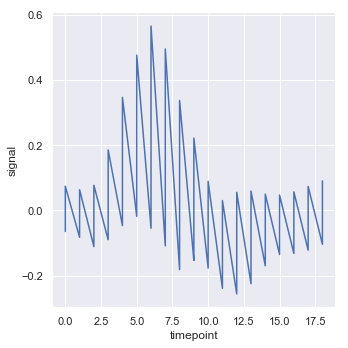

In [12]:
sns.relplot(x='timepoint', 
            y='signal',
            kind='line',
            estimator=None,
            data=fmri)